In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data = {
    'Name': ['John', 'Alice', 'Bob', 'David', 'Eva', 'Frank', 'Grace', 'Helen', 'Ian', 'Jane'],
    'Maths': [78, 85, 95, np.nan, 67, 54, 89, 77, 100, 60],
    'Science': [88, 92, np.nan, 76, 60, 45, 80, 75, 98, 65],
    'English': [90, 85, 88, 70, np.nan, 55, 77, 80, 85, 60]
}
df = pd.DataFrame(data)
print("Initial Dataset:\n", df)


Initial Dataset:
     Name  Maths  Science  English
0   John   78.0     88.0     90.0
1  Alice   85.0     92.0     85.0
2    Bob   95.0      NaN     88.0
3  David    NaN     76.0     70.0
4    Eva   67.0     60.0      NaN
5  Frank   54.0     45.0     55.0
6  Grace   89.0     80.0     77.0
7  Helen   77.0     75.0     80.0
8    Ian  100.0     98.0     85.0
9   Jane   60.0     65.0     60.0


In [7]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Name       0
Maths      1
Science    1
English    1
dtype: int64


In [8]:
# Fill missing numeric values with mean of each column
df.fillna(df.mean(numeric_only=True), inplace=True)

print("\nDataset after handling missing values:\n", df)



Dataset after handling missing values:
     Name       Maths    Science    English
0   John   78.000000  88.000000  90.000000
1  Alice   85.000000  92.000000  85.000000
2    Bob   95.000000  75.444444  88.000000
3  David   78.333333  76.000000  70.000000
4    Eva   67.000000  60.000000  76.666667
5  Frank   54.000000  45.000000  55.000000
6  Grace   89.000000  80.000000  77.000000
7  Helen   77.000000  75.000000  80.000000
8    Ian  100.000000  98.000000  85.000000
9   Jane   60.000000  65.000000  60.000000


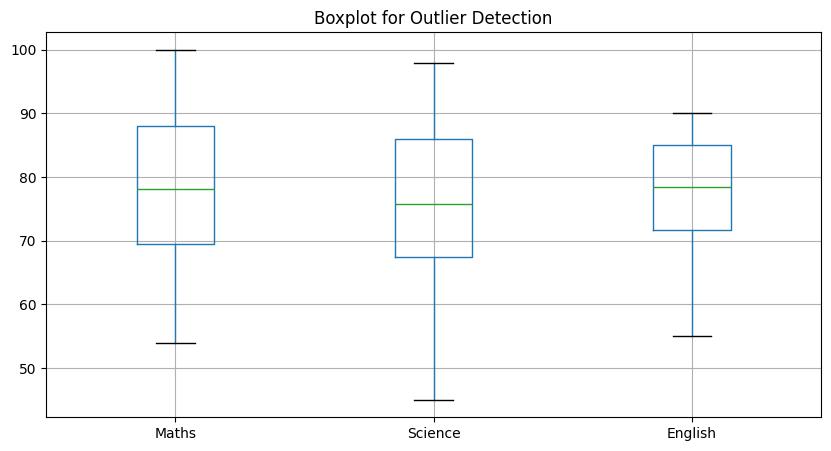

In [10]:
# Boxplots to visualize outliers
plt.figure(figsize=(10,5))
df[['Maths', 'Science', 'English']].boxplot()
plt.title("Boxplot for Outlier Detection")
plt.show()

In [11]:
# Function to remove outliers using IQR
def remove_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return col.apply(lambda x: np.nan if x < lower or x > upper else x)


In [13]:

# Apply outlier removal
df['Maths'] = remove_outliers(df['Maths'])
df['Science'] = remove_outliers(df['Science'])
df['English'] = remove_outliers(df['English'])



In [14]:
# Impute the removed outliers again with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)



In [15]:
print("\nDataset after outlier handling:\n", df)



Dataset after outlier handling:
     Name       Maths    Science    English
0   John   78.000000  88.000000  90.000000
1  Alice   85.000000  92.000000  85.000000
2    Bob   95.000000  75.444444  88.000000
3  David   78.333333  76.000000  70.000000
4    Eva   67.000000  60.000000  76.666667
5  Frank   54.000000  45.000000  55.000000
6  Grace   89.000000  80.000000  77.000000
7  Helen   77.000000  75.000000  80.000000
8    Ian  100.000000  98.000000  85.000000
9   Jane   60.000000  65.000000  60.000000


In [19]:
# Check skewness before transformation
print("\nSkewness Before Transformation:\n", df[['Maths', 'Science', 'English']].skew())




Skewness Before Transformation:
 Maths     -0.246327
Science   -0.530308
English   -0.857090
dtype: float64


In [21]:
# Apply log transformation to English scores
df['English_log'] = np.log(df['English'])



In [22]:
# Check skewness after transformation
print("\nSkewness After Log Transformation on English:\n", df['English_log'].skew())



Skewness After Log Transformation on English:
 -1.0658479260425484


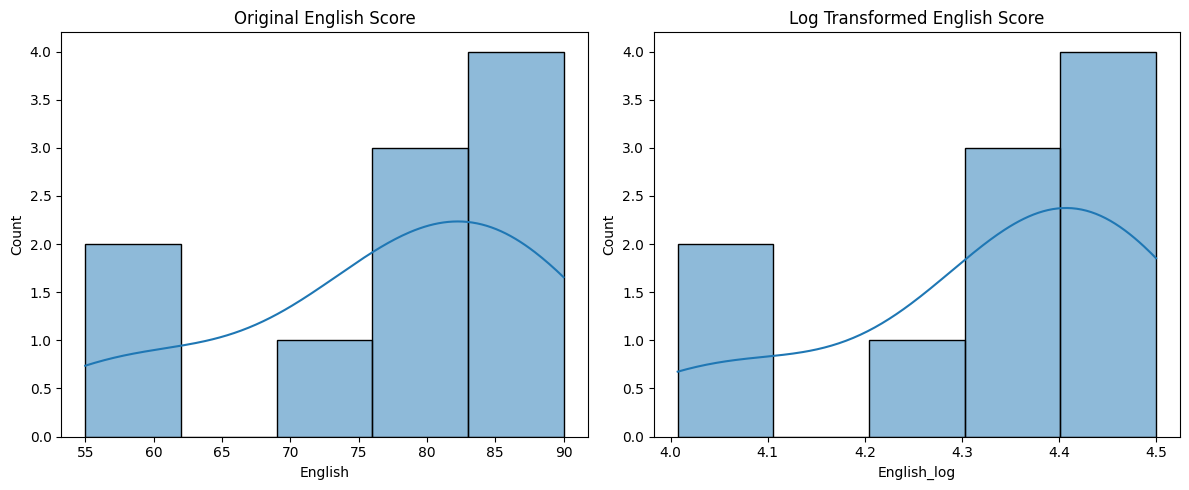

In [23]:
# Visualize distribution before and after transformation
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['English'], kde=True)
plt.title("Original English Score")

plt.subplot(1,2,2)
sns.histplot(df['English_log'], kde=True)
plt.title("Log Transformed English Score")

plt.tight_layout()
plt.show()
